In [1]:
#manipulation
import numpy as np
import pandas as pd

#visualisations

import matplotlib.pyplot as plt
import seaborn as sns

#interacting

from ipywidgets import interact 

In [2]:
#read
data = pd.read_csv('Suggest_Crop_Farmer.csv')

In [3]:
data.shape

(2200, 8)

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
457,6,63,23,26.016303,49.947047,5.906597,160.333745,pigeonpeas
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice
223,60,68,83,19.120652,18.434758,6.620901,85.529502,chickpea
1853,24,27,34,28.878630,95.113203,6.203377,145.058312,coconut
751,33,80,22,28.570061,65.717658,6.593962,70.086643,blackgram


In [6]:
#missing values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
print("average N in the soil: {0:.2f}".format(data['N'].mean()))
print("average P in the soil: {0:.2f}".format(data['P'].mean()))
print("average K in the soil: {0:.2f}".format(data['K'].mean()))
print("average Temp in celcius: {0:.2f}".format(data['temperature'].mean()))
print("average Humidity: {0:.2f}".format(data['humidity'].mean()))
print("average Ph of soil: {0:.2f}".format(data['ph'].mean()))
print("average Rainfall in mm: {0:.2f}".format(data['rainfall'].mean()))

average N in the soil: 50.55
average P in the soil: 53.36
average K in the soil: 48.15
average Temp in celcius: 25.62
average Humidity: 71.48
average Ph of soil: 6.47
average Rainfall in mm: 103.46


In [9]:
#Summary for each crop

@interact
def summary(crops=list(data['label'].value_counts().index)):
    a = data[data['label']==crops]
    print("----------------------")
    print("Stats for N")
    print("Min N required:", a['N'].min())
    print("Avg N required:", a['N'].mean())
    print("Max N required:", a['N'].max())
    print("----------------------")
    print("Stats for potassium")
    print("Min K required:", a['K'].min())
    print("Avg K required:", a['K'].mean())
    print("Max K required:", a['K'].max())
    print("----------------------")
    print("Stats for Phosphrous")
    print("Min P required:", a['P'].min())
    print("Avg P required:", a['P'].mean())
    print("Max P required:", a['P'].max())
    print("----------------------")
    print("Stats for temparature")
    print("Minimum Temp in celcius: {0:.2f}".format(a['temperature'].min()))
    print("average Temp in celcius: {0:.2f}".format(a['temperature'].mean()))
    print("Maximun Temp in celcius: {0:.2f}".format(a['temperature'].max()))
    print("----------------------")
    print("Stats for Humidity")
    print("min Humidity: {0:.2f}".format(a['humidity'].min()))
    print("average Humidity: {0:.2f}".format(a['humidity'].mean()))
    print("Max Humidity: {0:.2f}".format(a['humidity'].max()))
    print("----------------------")
    print("Stats for ph")
    print("min Ph of soil: {0:.2f}".format(a['ph'].min()))
    print("average Ph of soil: {0:.2f}".format(a['ph'].mean()))
    print("max Ph of soil: {0:.2f}".format(a['ph'].max()))
    print("----------------------")
    print("Stats for Rainfall")
    print("Min Rainfall in mm: {0:.2f}".format(a['rainfall'].min()))
    print("average Rainfall in mm: {0:.2f}".format(a['rainfall'].mean()))
    print("Max Rainfall in mm: {0:.2f}".format(a['rainfall'].max()))


interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [10]:
#Checking more than and less than average

@interact
def compare(conditions = ['N' , 'P' , 'K' , 'temparature' , 'ph', 'humidity', 'rainfall']):
    print("Crops which require greater than  avg conditons : " , conditions , '\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print('\n \n')
    print("Crops which require greater than  avg conditons : " , conditions , '\n')
    print(data[data[conditions]<data[conditions].mean()]['label'].unique())
    print('\n \n') 

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temparature', 'ph', 'humidit…

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


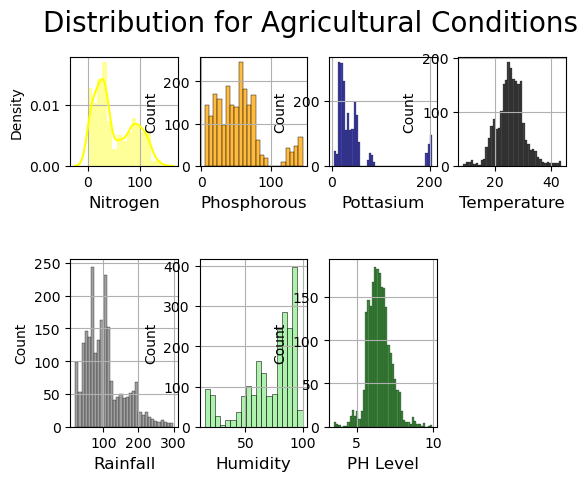

In [11]:
#Checking distributiion for each crop

plt.subplot(3,4,1)
sns.distplot(data['N'], color="yellow")
plt.xlabel('Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(3,4,2)
sns.histplot(data['P'], color="orange")
plt.xlabel('Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(3,4,3)
sns.histplot(data['K'], color="darkblue")
plt.xlabel('Pottasium', fontsize = 12)
plt.grid()

plt.subplot(3,4,4)
sns.histplot(data['temperature'], color="black")
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.histplot(data['rainfall'], color="grey")
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.histplot(data['humidity'], color="lightgreen")
plt.xlabel('Humidity', fontsize = 12)
plt.grid()
plt.subplot(2,4,7)
sns.histplot(data['ph'], color="darkgreen")
plt.xlabel('PH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [12]:

print("Some Interesting Patterns")
print("...........................................")
print("Crops that require very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops that require very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops that require very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops that require very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops that require very Low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("Crops that require very High Temperature:", data[data['temperature'] > 40]['label'].unique())
print("Crops that require very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops that require very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops that require very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
...........................................
Crops that require very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops that require very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops that require very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops that require very High Rainfall: ['rice' 'papaya' 'coconut']
Crops that require very Low Temperature: ['grapes']
Crops that require very High Temperature: ['grapes' 'papaya']
Crops that require very Low Humidity: ['chickpea' 'kidneybeans']
Crops that require very Low pH: ['mothbeans']
Crops that require very High pH: ['mothbeans']


In [13]:
#Checking which crop to be grown according to the season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("...........................................")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("...........................................")
print("Monsoon Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
...........................................
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
...........................................
Monsoon Crops
['rice' 'papaya' 'coconut']


In [15]:
max_n_value = data['N'].max()
unique_max_n_values = data[data['N'] == max_n_value]['label'].unique()
print(unique_max_n_values)

['cotton']
